# Julia Sets in Julia



## Task 4 :

In [2]:
"""
juliamap(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
"""
function juliamap(c,z; maxiter=100) # Implement the iteration for a Julia Set.
    for n= 1:maxiter #maxiter=100
        z=z^2+2
        if abs(z) > 2
            return n
        end
    end
    return
end

#@doc juliamap

juliamap (generic function with 1 method)

In [3]:
# Specialize juliamap to c=0
j0(z) = juliamap(0,z)

# Vectorize j0 over arrays of Complex numbers
@vectorize_1arg Complex j0

# List the available methods for j0 for different types
methods(j0)

# 4 methods for generic function "j0":
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},1}) at operators.jl:380
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},2}) at operators.jl:381
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},N}) at operators.jl:383
j0(z) at In[3]:2

### Discuss what it is doing in your notebook.


::AbstractArray{T<:Complex{T<:Real},N}

An AbstractArray of dimension N containing any type T that is a subtype of Complex, which is composed of parts of any (different) type T that is a subtype of Real.

### Why does j0 now include a method that handles this type?



# Complex Plane:  Take 1

In [4]:
# Create a complex plane

function complex_plane(xmin=-2, xmax=2, ymin=-2, ymax=2; xpoints=2000, ypoints=2000)
    # y is a column vector
    y = linspace(ymin, ymax, ypoints)

    # x uses a transpose, yielding a row vector
    x = linspace(xmin, xmax, xpoints)'

    # z uses broadcasted addition and multiplication to create a plane
    z = x .+ y.*im;

    # The final line of a block is treated as the return value, in the absence
    # of an explicit return statement
end

complex_plane (generic function with 5 methods)

In [5]:
# run this:

# The vectorized function can be applied directly to the plane
@time cp = complex_plane()
@time j0p = j0(cp)

  0.765379 seconds (561.92 k allocations: 85.382 MB, 7.03% gc time)
  0.508714 seconds (4.04 M allocations: 93.562 MB, 13.15% gc time)


2000x2000 Array{Union{Int64,Void},2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1

### Discuss exactly how this code works.  
We creat a complex plane with a column vector and a row vector and then we add our equation in z to creat te plane we want.
### What's the difference between the comma and the semicolon in the list of arguments?
creating a row with the comma and if we want to add another row we use the semicolon.


# Complex Plane:  Take 2

In [6]:
immutable ComplexPlane
    x :: LinSpace{Float64}
    y :: LinSpace{Float64}
    z :: Array{Complex{Float64},2}
    
    function ComplexPlane(xmin=-2, xmax=2, ymin=-2, ymax=2;
                            xpoints=2000, ypoints=2000)
        x = linspace(xmin, xmax, xpoints)
        y = linspace(ymin, ymax, ypoints)
        z = x' .+ y.*im
        new(x,y,z)
    end
end

In [7]:
cp = ComplexPlane(xpoints=200,ypoints=200);
typeof(cp)

ComplexPlane

In [8]:
print(typeof(cp.x))
j0(cp.z)

LinSpace{Float64}

200x200 Array{Union{Int64,Void},2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  

### What is being done here? What is "immutable" vs. "type"?

immutable:
Such types behave much like other composite types, except that instances of them cannot be modified. Immutable types have several advantages:
1- They are more efficient in some cases. Types like the ComplexPlane example above can be packed efficiently into arrays, and in some cases the compiler is able to avoid allocating immutable objects entirely.
2- It is not possible to violate the invariants provided by the type’s constructors.

type:
Composite types with no fields are singletons; there can be only one instance of such types.
The singleton types means for each type, T, the “singleton type” Type{T} is an abstract type whose only instance is the object T.

### How does this method compare to a Python class?



# Plotting with PyPlot

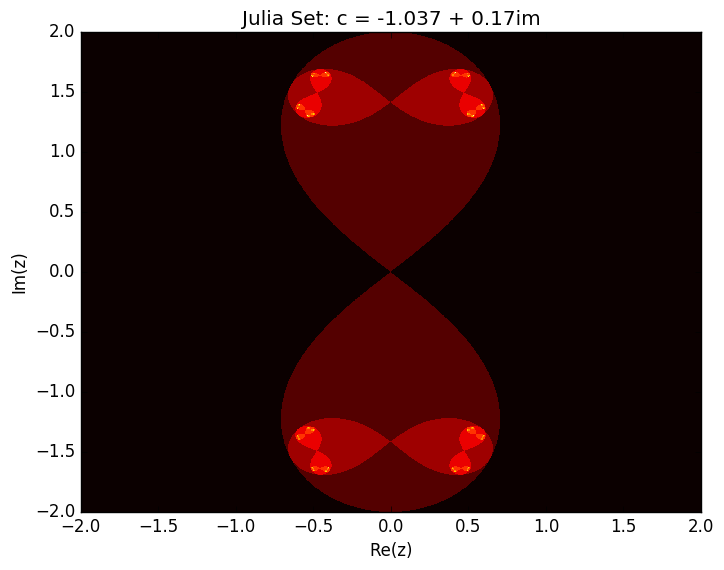

In [9]:
using PyPlot                         #  Load package into the current namespace
c = -1.037 + 0.17im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")                      #  Output figure to png file

# Task 5 :
###### 1- Change the seed value (c) in the code for generating Julia Sets to see what happens.  Find values of c that you like.

##### Plot 5 of your favorite Julia Sets in your notebook.


## 1)  c = -0.624 + 0.435im 

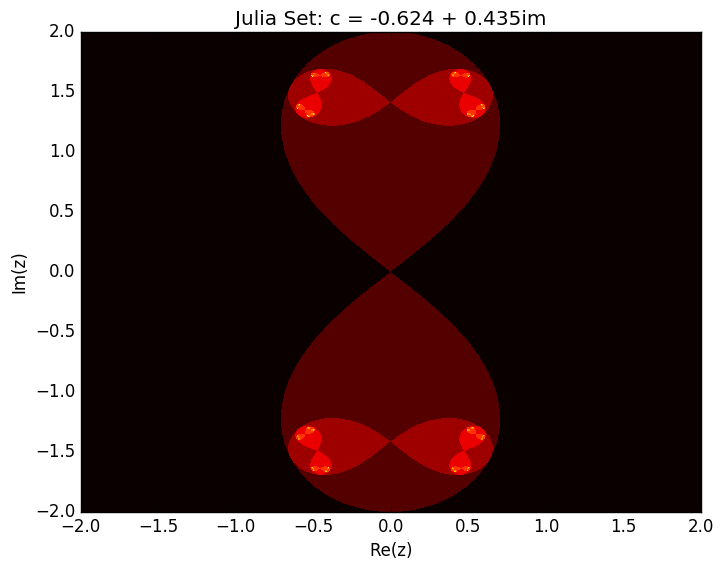

In [10]:
using PyPlot                       
c = -0.624 + 0.435im                 
j(z) = juliamap(c, z)                
@vectorize_1arg Complex j            
cp = ComplexPlane()                  
jp = j(cp.z);                       

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")

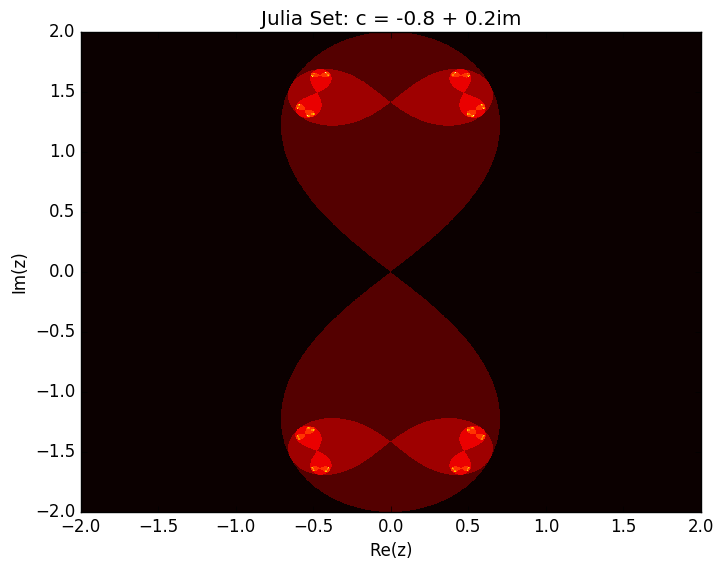

In [11]:
using PyPlot                       
c = -0.8 + 0.2im                 
j(z) = juliamap(c, z)                
@vectorize_1arg Complex j            
cp = ComplexPlane()                  
jp = j(cp.z);                       

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")

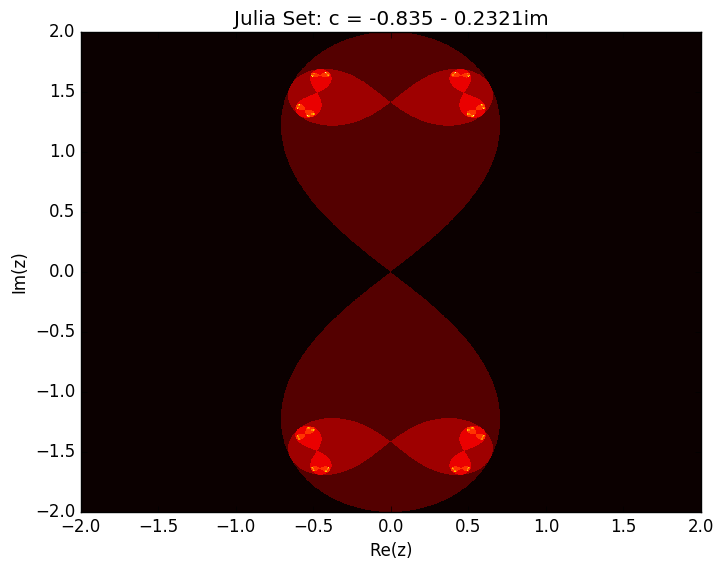

In [12]:
using PyPlot                       
c = -0.835 - 0.2321im                 
j(z) = juliamap(c, z)                
@vectorize_1arg Complex j            
cp = ComplexPlane()                  
jp = j(cp.z);                       

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")